In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("LD2011_2014.txt", sep=";", index_col=0, parse_dates=True, decimal=',')

# Convert to hourly frequency and calculate total load across all clients
df = df.resample('1h').mean()
df['total_load'] = df.sum(axis=1)
df = df[['total_load']].dropna()



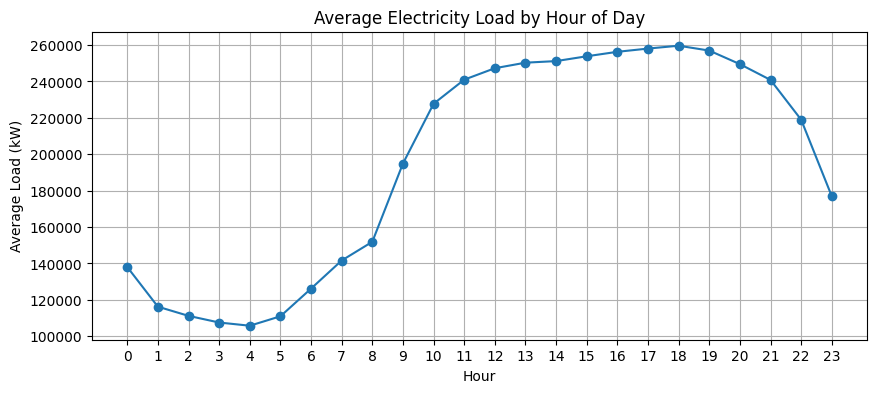

In [5]:
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')['total_load'].mean()

plt.figure(figsize=(10, 4))
plt.plot(hourly_avg, marker='o')
plt.title("Average Electricity Load by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Load (kW)")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


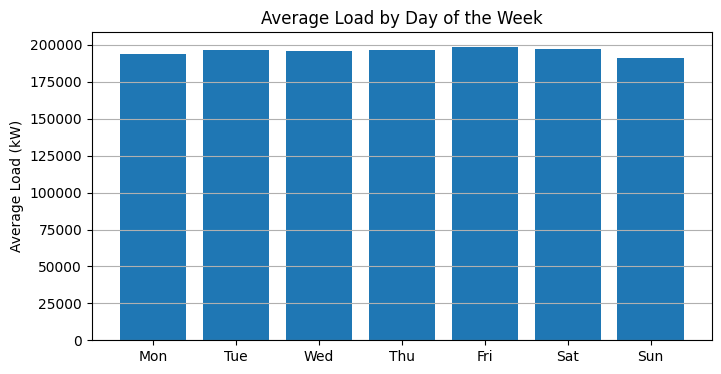

In [6]:
df['weekday'] = df.index.dayofweek
weekday_avg = df.groupby('weekday')['total_load'].mean()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8, 4))
plt.bar(weekday_labels, weekday_avg)
plt.title("Average Load by Day of the Week")
plt.ylabel("Average Load (kW)")
plt.grid(True, axis='y')
plt.show()


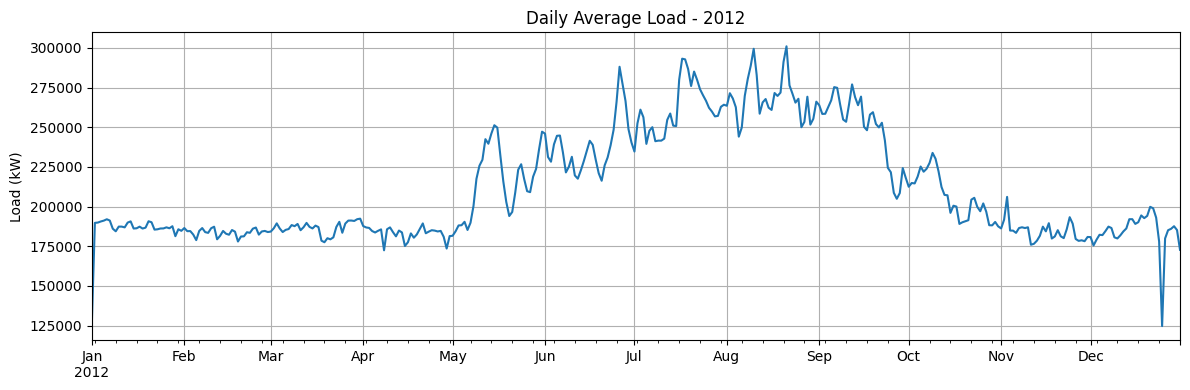

In [8]:
df_sample = df.loc['2012'].copy()

plt.figure(figsize=(12, 4))
df_sample['total_load'].resample('1D').mean().plot()
plt.title("Daily Average Load - 2012")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()


Note: you may need to restart the kernel to use updated packages.


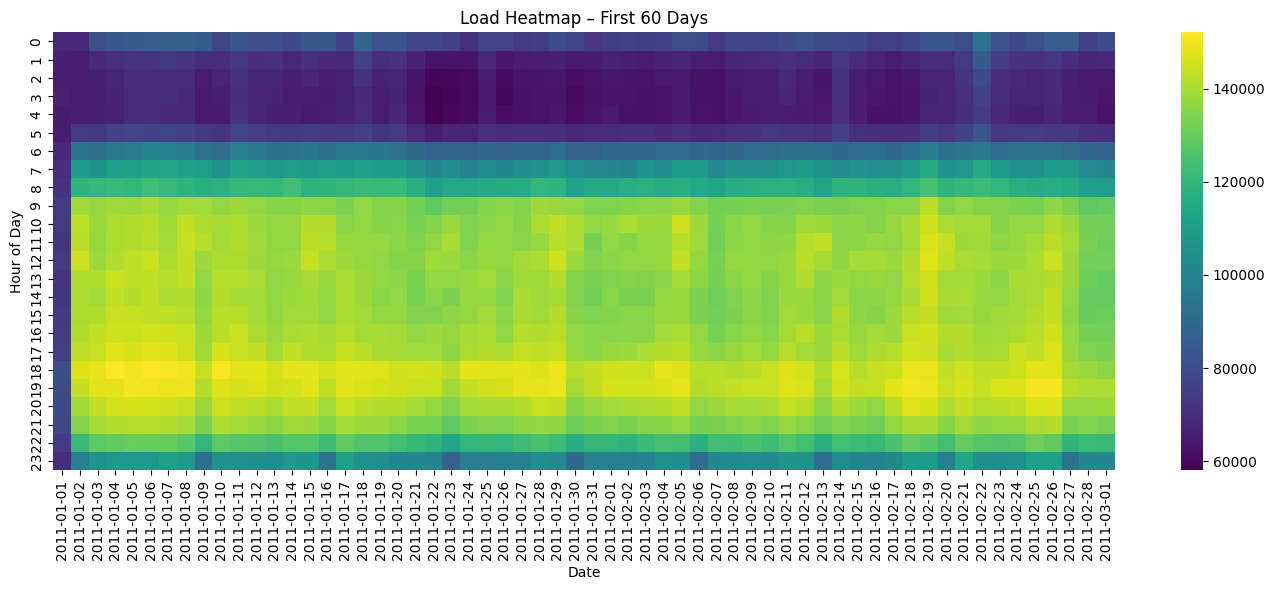

In [9]:
%pip install seaborn

import seaborn as sns
df['date'] = df.index.date
pivot = df.pivot_table(index='hour', columns='date', values='total_load')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot.iloc[:, :60], cmap='viridis')  # Show first 60 days
plt.title("Load Heatmap – First 60 Days")
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()
